In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel("global_laptop_selling_data.xlsx")

In [6]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df1 = df.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [11]:
from pandas.core.dtypes.common import is_numeric_dtype

In [12]:
for i in df1.columns:
    if is_numeric_dtype(df1[i]):
        continue
    else:
        df1[i] = le.fit_transform(df1[i])

In [13]:
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


In [14]:
df1.shape

(1303, 13)

In [15]:
df1.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [16]:
df1.drop_duplicates(inplace=True)

In [17]:
df1.shape

(1303, 13)

In [18]:
df1.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [19]:
x = df1.drop('Price_euros',axis=1)

In [20]:
x.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,1,300,4,13.3,23,65,8,4,56,8,38
1,2,1,301,4,13.3,1,63,8,2,50,8,35
2,3,7,50,3,15.6,8,74,8,16,52,4,74
3,4,1,300,4,15.4,25,85,1,29,8,8,71
4,5,1,300,4,13.3,23,67,8,16,57,8,38


In [21]:
y = df1[['Price_euros']]

In [22]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=55)

In [25]:
xtrain.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
876,887,2,559,3,15.6,0,113,5,10,43,2,148
368,374,4,245,3,15.6,8,97,8,16,29,5,116
846,856,7,102,0,11.6,36,37,5,23,42,1,50
1128,1143,10,291,1,15.6,15,77,8,5,75,4,124
468,475,7,318,1,17.3,15,102,0,10,75,5,164


In [26]:
xtest.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
62,63,10,220,3,14.0,15,60,8,16,52,4,70
744,752,10,481,5,15.6,12,99,1,12,103,5,129
752,761,2,566,3,15.6,0,70,5,10,82,4,123
387,393,4,349,5,15.6,8,72,8,26,1,5,108
998,1012,2,397,1,15.6,8,102,1,18,72,5,129


In [27]:
ytrain.head()

,Price_euros
876,398.99
368,899.00
846,615.00
1128,989.00
468,1699.00


In [28]:
ytest.head()

,Price_euros
62,599.0
744,3299.0
752,579.0
387,1369.0
998,1799.0


# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
Reg = LinearRegression()

In [31]:
Reg.fit(xtrain,ytrain)

LinearRegression()

In [32]:
pred = Reg.predict(xtest)

In [33]:
pred

array([[ 806.81849699],
       [1884.13406647],
       [ 879.9085496 ],
       [ 612.19691995],
       [1652.13256137],
       [1246.8174127 ],
       [1875.66917957],
       [ 266.22749838],
       [1324.57746456],
       [ 848.28567204],
       [1191.82438752],
       [1084.41838184],
       [1927.80856603],
       [1967.98278141],
       [1799.1269048 ],
       [1100.7650868 ],
       [1214.76376637],
       [1571.6979278 ],
       [ 754.93229711],
       [1144.63610017],
       [1550.97747797],
       [ 998.01350181],
       [ 691.74261323],
       [ 740.31738945],
       [1321.65841277],
       [ 948.83908593],
       [1370.16543111],
       [1784.09363324],
       [1812.40621589],
       [ 761.63108315],
       [1029.11736869],
       [1212.53026662],
       [ 797.39194605],
       [ 532.41938665],
       [1787.82879238],
       [ 792.09011646],
       [1002.86217338],
       [1126.81238225],
       [1518.79117838],
       [1633.77470227],
       [1039.33967683],
       [1477.313

In [34]:
m = Reg.coef_

In [35]:
m

array([[ 1.31185583e-01,  1.13794244e+01, -8.53795055e-02,
        -8.18510882e+00,  7.60150452e+01,  1.79655545e+01,
         9.19032419e+00, -3.94746046e+01,  1.02460855e+01,
         7.48941752e+00,  1.19698916e+02, -2.33159628e+00]])

In [36]:
c = Reg.intercept_

In [37]:
c

array([-1710.18919208])

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [39]:
mse = mean_squared_error(ytest,pred)

In [40]:
mse

231555.72842541573

In [41]:
mae = mean_absolute_error(ytest,pred)

In [42]:
mae

368.81026664772554

In [43]:
Result1 = Reg.score(xtest,ytest)

In [44]:
Result1

0.4985463720498293

# Applying KNN

In [45]:
df2 = df.copy()

In [46]:
df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [47]:
from pandas.core.dtypes.common import is_numeric_dtype

In [48]:
for i in df2.columns:
    if is_numeric_dtype(df2[i]):
        continue
    else:
        df2[i] = le.fit_transform(df2[i])

In [49]:
df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


In [50]:
x = df2.drop('Price_euros',axis=1)

In [51]:
x.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,1,300,4,13.3,23,65,8,4,56,8,38
1,2,1,301,4,13.3,1,63,8,2,50,8,35
2,3,7,50,3,15.6,8,74,8,16,52,4,74
3,4,1,300,4,15.4,25,85,1,29,8,8,71
4,5,1,300,4,13.3,23,67,8,16,57,8,38


In [52]:
y = df2[['Price_euros']]

In [53]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [54]:
from sklearn.model_selection import train_test_split as tts

In [55]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=55)

In [56]:
xtrain.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
876,887,2,559,3,15.6,0,113,5,10,43,2,148
368,374,4,245,3,15.6,8,97,8,16,29,5,116
846,856,7,102,0,11.6,36,37,5,23,42,1,50
1128,1143,10,291,1,15.6,15,77,8,5,75,4,124
468,475,7,318,1,17.3,15,102,0,10,75,5,164


In [57]:
xtest.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
62,63,10,220,3,14.0,15,60,8,16,52,4,70
744,752,10,481,5,15.6,12,99,1,12,103,5,129
752,761,2,566,3,15.6,0,70,5,10,82,4,123
387,393,4,349,5,15.6,8,72,8,26,1,5,108
998,1012,2,397,1,15.6,8,102,1,18,72,5,129


In [58]:
ytrain.head()

,Price_euros
876,398.99
368,899.00
846,615.00
1128,989.00
468,1699.00


In [59]:
ytest.head()

,Price_euros
62,599.0
744,3299.0
752,579.0
387,1369.0
998,1799.0


In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
ne = KNeighborsRegressor()

In [62]:
ne.fit(xtrain,ytrain)

KNeighborsRegressor()

In [63]:
pred2 = ne.predict(xtest)

In [64]:
pred2

array([[ 621.38 ],
       [1238.684],
       [1385.068],
       [1207.8  ],
       [1518.58 ],
       [1839.4  ],
       [ 846.6  ],
       [ 410.6  ],
       [ 855.764],
       [ 842.086],
       [1421.   ],
       [ 935.532],
       [1198.096],
       [1360.22 ],
       [1118.82 ],
       [1063.8  ],
       [ 914.832],
       [1254.1  ],
       [ 763.49 ],
       [ 940.16 ],
       [ 933.58 ],
       [1035.2  ],
       [ 473.534],
       [ 495.358],
       [ 759.6  ],
       [1219.4  ],
       [1119.2  ],
       [1294.612],
       [ 902.8  ],
       [ 857.94 ],
       [1114.546],
       [ 683.978],
       [1427.4  ],
       [ 863.594],
       [1533.   ],
       [ 913.68 ],
       [1072.65 ],
       [1270.8  ],
       [1339.6  ],
       [2173.154],
       [1035.424],
       [ 953.632],
       [1310.614],
       [2493.38 ],
       [1823.742],
       [1342.884],
       [1205.802],
       [1847.4  ],
       [1983.8  ],
       [1304.2  ],
       [ 830.   ],
       [ 736.198],
       [1684

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [66]:
mse2 = mean_squared_error(ytest,pred2)

In [67]:
mse2

271400.8910270588

In [68]:
mae2 = mean_absolute_error(ytest,pred2)

In [69]:
mae2

360.48814833759593

In [70]:
Result2 = ne.score(xtest,ytest)

In [71]:
Result2

0.4122582828769712

# Applying Decision Tree

In [72]:
df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


In [73]:
x = df2.drop('Price_euros',axis=1)

In [74]:
x.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,1,300,4,13.3,23,65,8,4,56,8,38
1,2,1,301,4,13.3,1,63,8,2,50,8,35
2,3,7,50,3,15.6,8,74,8,16,52,4,74
3,4,1,300,4,15.4,25,85,1,29,8,8,71
4,5,1,300,4,13.3,23,67,8,16,57,8,38


In [75]:
y = df2[['Price_euros']]

In [76]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [77]:
from sklearn.model_selection import train_test_split as tts

In [78]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [79]:
xtrain.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
1158,1176,10,81,3,15.6,8,68,8,1,20,5,129
904,916,10,471,3,15.6,15,74,8,29,52,5,83
439,446,2,538,3,15.6,8,74,5,16,52,2,148
581,588,4,281,3,15.6,0,78,8,26,52,5,87
676,684,2,611,4,14.0,8,74,8,16,52,5,21


In [80]:
xtest.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
479,486,16,334,3,13.3,15,74,8,16,52,5,8
1022,1036,7,417,3,13.3,15,74,8,16,52,5,12
298,303,10,202,3,15.6,8,0,7,10,17,5,124
1265,1283,10,225,3,15.6,15,92,8,10,85,5,135
774,783,7,110,4,12.5,0,68,5,16,46,5,28


In [81]:
ytrain.head()

,Price_euros
1158,788.49
904,1962.99
439,559.00
581,1008.52
676,1135.00


In [82]:
ytest.head()

,Price_euros
479,1672.0
1022,1149.0
298,499.0
1265,899.0
774,1244.0


In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
de = DecisionTreeRegressor()

In [85]:
de.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [86]:
pred3 = de.predict(xtest)

In [87]:
pred3

array([ 999.  , 1690.  ,  549.  ,  899.  , 1082.  , 1399.  ,  785.  ,
        499.  , 1196.  ,  258.  , 1899.  ,  906.62, 1825.  ,  805.99,
       1407.  , 1269.  , 1323.  ,  906.62,  859.01, 1877.  , 2399.  ,
        720.32, 1229.  ,  202.9 , 1096.16, 1369.9 ,  779.  ,  742.  ,
       1670.  ,  955.  ,  459.  , 1799.  , 1790.  , 1150.  ,  860.  ,
        689.  ,  742.  ,  489.  , 1169.  ,  174.  , 1584.  ,  549.  ,
       1144.5 , 1029.  ,  769.99,  955.  , 1299.  ,  210.8 ,  836.  ,
       1477.  , 1535.  ,  520.9 , 1195.  , 1082.  ,  898.9 ,  998.  ,
        209.  ,  800.  ,  860.  ,  899.  , 1820.  ,  689.  ,  443.9 ,
        572.  ,  288.9 , 1799.  ,  650.  ,  899.  ,  787.  , 3588.8 ,
       3588.8 ,  846.5 ,  479.  , 1018.99,  347.  ,  479.  ,  509.  ,
       1763.  ,  997.9 , 1499.  , 1770.  ,  659.  ,  248.9 ,  846.5 ,
        298.  , 1299.  ,  398.49, 1407.  , 1649.  , 1119.91, 1262.4 ,
       3588.8 , 1119.91,  675.  ,  857.07,  403.  ,  879.  ,  739.  ,
        749.  , 1010

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [89]:
mse3 = mean_squared_error(ytest,pred3)

In [90]:
mse3

181526.36419514066

In [91]:
mae3 = mean_absolute_error(ytest,pred3)

In [92]:
mae3

255.29961636828642

In [93]:
Result3 = de.score(xtest,ytest)

In [94]:
Result3

0.6610024517596114

# Applying Random Forest Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf = RandomForestRegressor()

In [97]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [98]:
pred4 = rf.predict(xtest)

In [99]:
pred4

array([1251.8082, 1647.0749,  550.9318,  952.657 , 1332.9605, 1480.0542,
        745.2336,  537.67  , 1223.6532,  316.2323, 1863.9126,  792.3251,
       1733.8742,  759.6321, 1818.5976, 1220.4957, 1364.5084, 1122.6149,
        998.6478, 2013.2   , 2130.4871,  715.0253, 1269.7398,  305.478 ,
        997.63  , 1168.6121,  678.8708,  690.8385, 1603.06  ,  982.2143,
        487.1802, 1764.3779, 1763.1976, 1327.3503,  949.0646,  877.4617,
        794.1956,  490.9737, 1211.9241,  275.2305, 1575.853 ,  624.9409,
       1257.2163, 1668.7827,  621.1223,  991.4531, 1633.7528,  253.7461,
        894.633 , 1485.9553, 1627.904 ,  583.423 ,  957.0409, 1218.861 ,
        993.3346, 1404.6491,  236.367 ,  867.1745,  953.8058,  947.347 ,
       1460.1094,  829.6147,  446.2335,  645.9925,  312.8553, 2015.688 ,
        557.4831, 1020.134 ,  971.4979, 3035.9926, 2996.7311,  981.6131,
        555.165 ,  947.9396,  308.8307,  423.7263,  852.819 , 1972.0069,
       1296.2442, 1478.5737, 1264.9924, 1067.7727, 

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [101]:
mse4 = mean_squared_error(ytest,pred4)

In [102]:
mse4

111730.1049439124

In [103]:
mae4 = mean_absolute_error(ytest,pred4)

In [104]:
mae4

195.53588388746795

In [105]:
Result4 = rf.score(xtest,ytest)

In [106]:
Result4

0.7913458366856799

# Applying SVM 

In [107]:
df2.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,56,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,50,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,52,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,8,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,57,8,38,1803.60


In [108]:
x = df2.drop('Price_euros',axis=1)

In [109]:
x.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,1,300,4,13.3,23,65,8,4,56,8,38
1,2,1,301,4,13.3,1,63,8,2,50,8,35
2,3,7,50,3,15.6,8,74,8,16,52,4,74
3,4,1,300,4,15.4,25,85,1,29,8,8,71
4,5,1,300,4,13.3,23,67,8,16,57,8,38


In [110]:
y = df2[['Price_euros']]

In [111]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [112]:
from sklearn.model_selection import train_test_split as tts

In [113]:
xtrain1,xtest1,ytrain1,ytest1 = tts(x,y,test_size=0.3,random_state=88)

In [114]:
xtrain1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
872,883,16,441,3,15.6,15,97,8,16,52,5,96
906,918,7,116,2,12.5,8,97,8,29,52,5,28
1192,1210,7,50,3,15.6,0,74,5,26,52,5,74
1300,1318,10,196,3,14.0,0,34,3,35,39,5,56
1009,1023,7,369,3,14.0,0,59,5,26,52,5,59


In [115]:
xtest1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
560,567,0,424,0,11.6,13,38,5,23,42,5,27
732,740,7,12,3,15.6,8,15,7,5,5,5,105
436,443,7,37,3,15.6,0,36,5,26,40,5,105
497,504,7,111,3,14.0,8,99,8,12,52,5,48
5,6,0,58,3,15.6,0,14,5,26,16,5,105


In [116]:
ytrain1.head()

,Price_euros
872,1388.0
906,1483.0
1192,485.0
1300,229.0
1009,684.0


In [117]:
ytest1.head()

,Price_euros
560,349.0
732,650.0
436,347.0
497,1749.0
5,400.0


In [118]:
from sklearn.svm import SVR

In [119]:
svm1 = SVR(kernel='linear')

In [120]:
svm1.fit(xtrain1,ytrain1)

SVR(kernel='linear')

In [121]:
Result_SVM = svm1.score(xtest1,ytest1)

In [122]:
Result_SVM

0.4526640341708146

In [123]:
svm2 = SVR(kernel='rbf')

In [124]:
svm2.fit(xtrain1,ytrain1)

SVR()

In [125]:
svm2.score(xtest1,ytest1)

-0.02928563757261249

In [126]:
data = {'Name':['Logtistic_Regression Accuracy','KNN Accuracy','Decision_Tree Accuracy','Random_Forest Accuracy','SVM Accuracy'],
       'Accuracy':[Result1,Result2,Result3,Result4,Result_SVM]}
df_after_pred = pd.DataFrame(data=data)

In [127]:
df_after_pred

,Name,Accuracy
0,Logtistic_Regression Accuracy,0.498546
1,KNN Accuracy,0.412258
2,Decision_Tree Accuracy,0.661002
3,Random_Forest Accuracy,0.791346
4,SVM Accuracy,0.452664


<Axes: xlabel='Accuracy', ylabel='Name'>

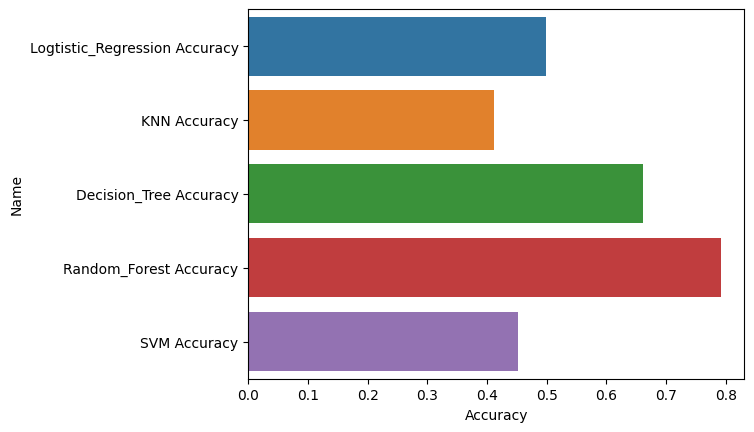

In [128]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)

# Gradio Deployment

In [129]:
import gradio as gr
import warnings
warnings.filterwarnings("ignore")

In [130]:
def result_best(laptop_id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight):
    result = rf.predict([[laptop_id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight]])
    return result

In [131]:
result_best(1,1,300,4,13.3,23,65,8,4,56,8,38)

array([1396.0405])

In [132]:
input1 = gr.inputs.Number(label='laptop_id')
input2 = gr.inputs.Number(label='Company')
input3 = gr.inputs.Number(label='Product')
input4 = gr.inputs.Number(label='TypeName')
input5 = gr.inputs.Number(label='Inches')
input6 = gr.inputs.Number(label='ScreenResolution')
input7 = gr.inputs.Number(label='Cpu')
input8 = gr.inputs.Number(label='Ram')
input9 = gr.inputs.Number(label='Memory')
input10 = gr.inputs.Number(label='Gpu')
input11 = gr.inputs.Number(label='OpSys')
input12 = gr.inputs.Number(label='Weight')

In [133]:
output = gr.outputs.Textbox(label='Result')

In [134]:
interface = gr.Interface(
      fn = result_best,
      inputs = [input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12],
     outputs = [output]
  ).launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
